# Data Visualization

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd

Get a list of all files:

In [2]:
Ad_folder = '../Data/audio_ads' # audio files location

pos_files = []
for r,d,f in os.walk(Ad_folder):
    for filename in f:
        if '.mp3' in filename:
            pos_files.append(os.path.join(Ad_folder,filename))
            
Music_folder = '../Data/Music' # audio files location

neg_files = []
for r,d,f in os.walk(Music_folder):
    for filename in f:
        if '.mp3' or '.au' in filename:
            neg_files.append(os.path.join(Music_folder,filename))

How many mp3 files do we have?

In [3]:
n_pos_files = len(pos_files)
n_neg_files = len(neg_files)

print('We have ' + str(n_pos_files) + ' positive examples')
print('We have ' + str(n_neg_files) + ' negative examples')

We have 2303 positive examples
We have 1023 negative examples


### Load files to memory

In [4]:
audio_list = []

for i in range(5):
    audio_list.append(librosa.core.load(pos_files[i])[0])
    if i==0:
        sr = librosa.core.load(pos_files[i])[1]

for i in range(5,10):
    audio_list.append(librosa.core.load(neg_files[i])[0])

In [5]:
len(audio_list)

10

In [6]:
sr

22050

### Plot waveform:

In [7]:
n = 5 # file number to plot 

Text(0.5, 0, 'Time (s)')

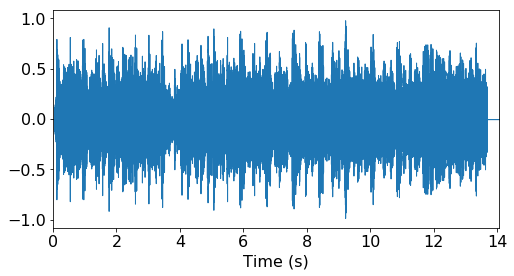

In [8]:
plt.rcParams.update({'font.size': 16})
plt.figure(figsize= (8,4))
librosa.display.waveplot(audio_list[n])
plt.xlabel('Time (s)')

### Plot spectogram:

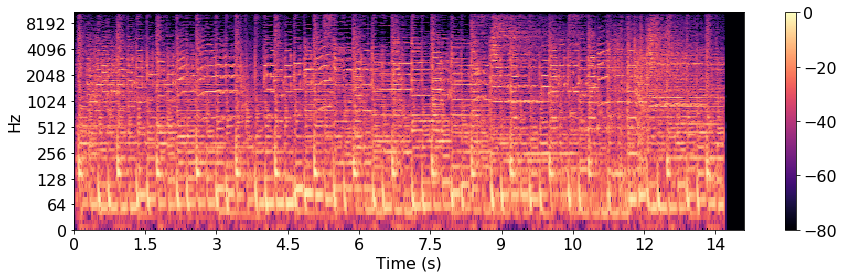

In [9]:
D = librosa.core.stft(audio_list[n])
S, P = librosa.core.magphase(D)
Sdb = librosa.amplitude_to_db(S, ref=np.max)

plt.figure(figsize = (15,4))
librosa.display.specshow(Sdb, x_axis='time', y_axis='log')
plt.xlabel('Time (s)')
plt.colorbar()

In [10]:
mfccs = librosa.feature.mfcc(audio_list[n], sr=sr, n_mfcc=13, dct_type=2)
mfccs.shape

(13, 607)

In [11]:
audio_list[n].shape

(310464,)

In [12]:
1264259.0/2470.0

511.8457489878543

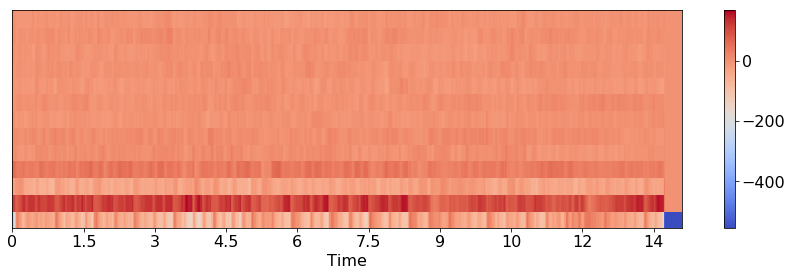

In [13]:
plt.figure(figsize = (15,4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()

In [14]:
ipd.Audio(audio_list[n], rate = sr)